In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic BMW sales data (2010-2024)
years = range(2010, 2025)
months = range(1, 13)
models = ['3 Series', '5 Series', 'X3', 'X5', '7 Series']
regions = ['North America', 'Europe', 'Asia']
dates = [datetime(year, month, 1) for year in years for month in months]

data = []
base_sales = {'3 Series': 5000, '5 Series': 4000, 'X3': 3000, 'X5': 3500, '7 Series': 2000}
growth_factors = np.linspace(0.8, 1.5, len(dates))  # Growth trend

for i, date in enumerate(dates):
    for model in models:
        for region in regions:
            sales = int(base_sales[model] * growth_factors[i] * np.random.uniform(0.7, 1.3))
            avg_price = {'3 Series': 45000, '5 Series': 55000, 'X3': 50000, 'X5': 60000, '7 Series': 90000}[model]
            revenue = sales * avg_price * np.random.uniform(0.95, 1.05)
            data.append({'Date': date, 'Model': model, 'Region': region, 'Units_Sold': sales, 'Revenue': revenue})

df = pd.DataFrame(data)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Verify data
print("Goal 8: Dataset Created (Sample)")
print(df.head())
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())

Goal 8: Dataset Created (Sample)
        Date     Model         Region  Units_Sold       Revenue  Year  Month
0 2010-01-01  3 Series  North America        3698  1.739103e+08  2010      1
1 2010-01-01  3 Series         Europe        4556  2.070427e+08  2010      1
2 2010-01-01  3 Series           Asia        3174  1.379166e+08  2010      1
3 2010-01-01  5 Series  North America        2351  1.340398e+08  2010      1
4 2010-01-01  5 Series         Europe        3394  1.905541e+08  2010      1

Shape: (2700, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2700 non-null   datetime64[ns]
 1   Model       2700 non-null   object        
 2   Region      2700 non-null   object        
 3   Units_Sold  2700 non-null   int64         
 4   Revenue     2700 non-null   float64       
 5   Year        2700 non-null   int32

In [5]:
# Check for issues
print("Goal 8: Data Cleaning")
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Negative Values:", (df['Units_Sold'] < 0).sum(), (df['Revenue'] < 0).sum())

# Add revenue per unit
df['Revenue_Per_Unit'] = df['Revenue'] / df['Units_Sold']

# Aggregate yearly data for some analyses
yearly_sales = df.groupby(['Year', 'Model', 'Region']).agg({'Units_Sold': 'sum', 'Revenue': 'sum'}).reset_index()
print("\nCleaned Yearly Data (Sample):\n", yearly_sales.head())

Goal 8: Data Cleaning
Missing Values:
 Date          0
Model         0
Region        0
Units_Sold    0
Revenue       0
Year          0
Month         0
dtype: int64
Duplicates: 0
Negative Values: 0 0

Cleaned Yearly Data (Sample):
    Year     Model         Region  Units_Sold       Revenue
0  2010  3 Series           Asia       48409  2.180505e+09
1  2010  3 Series         Europe       51159  2.308939e+09
2  2010  3 Series  North America       49910  2.268606e+09
3  2010  5 Series           Asia       36712  2.011263e+09
4  2010  5 Series         Europe       38974  2.155508e+09


Goal 1: Yearly Sales Trends
Yearly Units Sold:
 Year
2010    516457
2011    529597
2012    562630
2013    613632
2014    631917
2015    670714
2016    701726
2017    722248
2018    740490
2019    791958
2020    813407
2021    833710
2022    863802
2023    889104
2024    929415
Name: Units_Sold, dtype: int64

Yearly Revenue:
 Year
2010    $29,041,728,360.49
2011    $30,134,605,699.77
2012    $31,847,842,425.82
2013    $34,433,439,979.28
2014    $35,584,706,141.60
2015    $37,620,835,010.07
2016    $39,341,103,603.75
2017    $40,749,421,003.45
2018    $41,859,754,833.15
2019    $44,502,346,383.67
2020    $45,696,656,824.13
2021    $47,018,869,862.92
2022    $48,887,503,059.33
2023    $50,056,965,083.38
2024    $52,436,518,386.07
Name: Revenue, dtype: object

Growth Rate (%):
 Year
2010     NaN
2011    2.54
2012    6.24
2013    9.06
2014    2.98
2015    6.14
2016    4.62
2017    2.92
2018    2.53
2019    6.95
2020    2.71
2021    2.50
2022    3.61
2023    2.93
2024    4.53
Name: Units_Sol

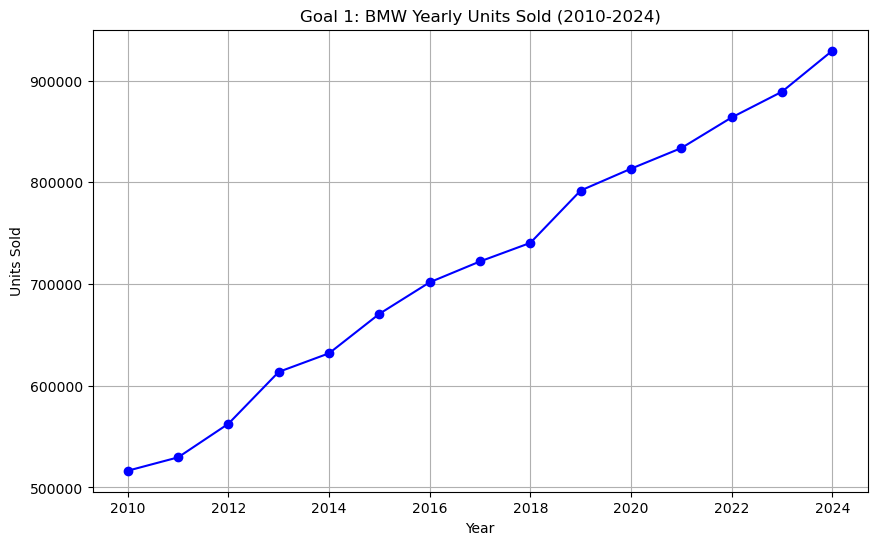

In [6]:
# Calculate yearly totals
yearly_total = df.groupby('Year')['Units_Sold'].sum()
yearly_revenue = df.groupby('Year')['Revenue'].sum()
growth_rate = yearly_total.pct_change() * 100

print("Goal 1: Yearly Sales Trends")
print("Yearly Units Sold:\n", yearly_total)
print("\nYearly Revenue:\n", yearly_revenue.apply(lambda x: f"${x:,.2f}"))
print("\nGrowth Rate (%):\n", growth_rate.round(2))

# Visualization
plt.figure(figsize=(10, 6))
yearly_total.plot(kind='line', marker='o', color='blue')
plt.title('Goal 1: BMW Yearly Units Sold (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

Goal 2: Top Models
By Units Sold:
 Model
3 Series    3101964
5 Series    2423844
X5          2164967
X3          1857174
7 Series    1262858
Name: Units_Sold, dtype: int64

By Revenue:
 Model
3 Series    $139,620,648,403.48
5 Series    $133,230,562,084.84
X5          $129,937,168,072.57
7 Series    $113,508,074,346.39
X3           $92,915,843,749.59
Name: Revenue, dtype: object


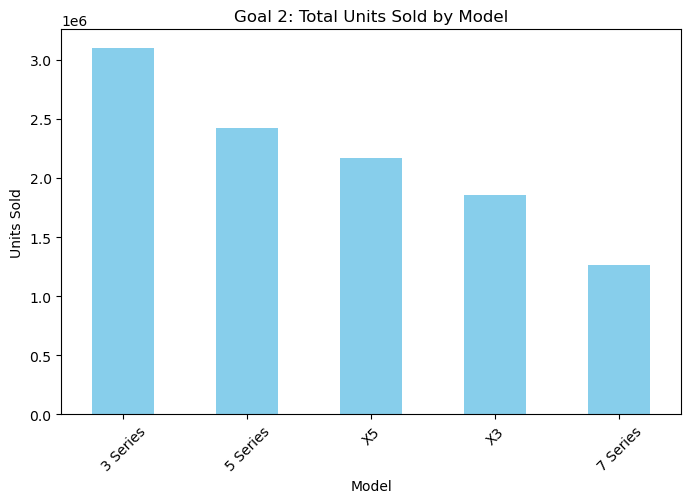

In [7]:
# Aggregate by model
model_sales = df.groupby('Model')['Units_Sold'].sum().sort_values(ascending=False)
model_revenue = df.groupby('Model')['Revenue'].sum().sort_values(ascending=False)

print("Goal 2: Top Models")
print("By Units Sold:\n", model_sales)
print("\nBy Revenue:\n", model_revenue.apply(lambda x: f"${x:,.2f}"))

# Visualization
plt.figure(figsize=(8, 5))
model_sales.plot(kind='bar', color='skyblue')
plt.title('Goal 2: Total Units Sold by Model')
plt.xlabel('Model')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

Goal 3: Regional Sales
By Units Sold:
 Region
North America    3622073
Asia             3614258
Europe           3574476
Name: Units_Sold, dtype: int64


<Figure size 1200x600 with 0 Axes>

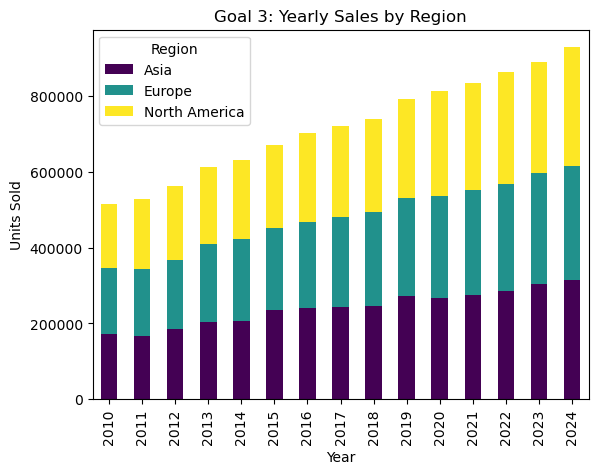

In [8]:
# Aggregate by region
region_sales = df.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)

print("Goal 3: Regional Sales")
print("By Units Sold:\n", region_sales)

# Stacked bar by year and region
region_pivot = df.groupby(['Year', 'Region'])['Units_Sold'].sum().unstack()
plt.figure(figsize=(12, 6))
region_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Goal 3: Yearly Sales by Region')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='Region')
plt.show()

Goal 4: Correlation Between Units Sold and Revenue
            Units_Sold   Revenue
Units_Sold    1.000000  0.824835
Revenue       0.824835  1.000000


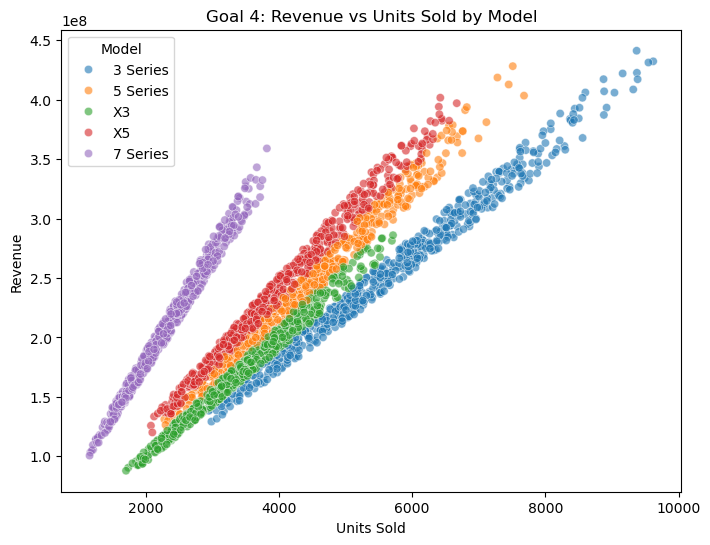

In [9]:
# Correlation
corr = df[['Units_Sold', 'Revenue']].corr()
print("Goal 4: Correlation Between Units Sold and Revenue")
print(corr)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Units_Sold', y='Revenue', hue='Model', alpha=0.6)
plt.title('Goal 4: Revenue vs Units Sold by Model')
plt.xlabel('Units Sold')
plt.ylabel('Revenue')
plt.show()

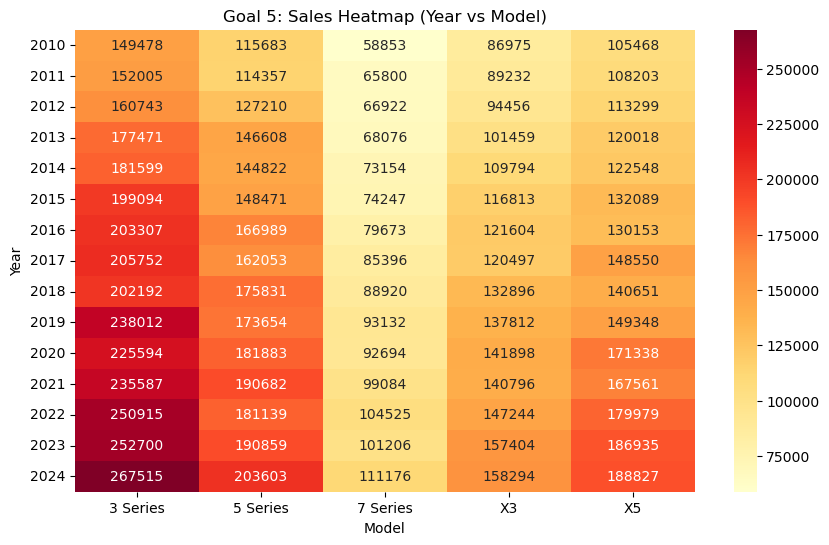

Goal 5: Average Monthly Sales
Month
1     3917.0
2     3949.0
3     3950.0
4     4011.0
5     3949.0
6     4020.0
7     3975.0
8     3995.0
9     4065.0
10    4082.0
11    4143.0
12    3990.0
Name: Units_Sold, dtype: float64


In [10]:
# Heatmap of sales by year and model
pivot_sales = df.groupby(['Year', 'Model'])['Units_Sold'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sales, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Goal 5: Sales Heatmap (Year vs Model)')
plt.xlabel('Model')
plt.ylabel('Year')
plt.show()

# Monthly seasonality (optional)
monthly_sales = df.groupby('Month')['Units_Sold'].mean()
print("Goal 5: Average Monthly Sales")
print(monthly_sales.round(0))

In [11]:
# Linear regression forecast
yearly_total = df.groupby('Year')['Units_Sold'].sum()
X = yearly_total.index.values.reshape(-1, 1)
y = yearly_total.values
model = LinearRegression()
model.fit(X, y)
future_years = np.array([[2025], [2026], [2027]])
forecast = model.predict(future_years)

print("Goal 6: Sales Forecast (2025-2027)")
for year, pred in zip([2025, 2026, 2027], forecast):
    print(f"{year}: {int(pred):,} units")

Goal 6: Sales Forecast (2025-2027)
2025: 956,710 units
2026: 986,208 units
2027: 1,015,707 units


In [16]:
# Summary metrics
total_units = df['Units_Sold'].sum()
total_revenue = df['Revenue'].sum()
top_model = df.groupby('Model')['Units_Sold'].sum().idxmax()
top_region = df.groupby('Region')['Units_Sold'].sum().idxmax()

print("Actionable Insights Summary")
print(f"- Total Units Sold: {total_units:,}")
print(f"- Total Revenue: ${total_revenue:,.2f}")
print(f"- Top Model: {top_model} ({df.groupby('Model')['Units_Sold'].sum().max():,})")
print(f"- Top Region: {top_region} ({df.groupby('Region')['Units_Sold'].sum().max():,})")
print("- Recommendation: Focus marketing on 3 Series in Europe to maximize volume; promote 7 Series for high-margin sales.")

# Save summary
summary_df = pd.DataFrame({
    'Metric': ['Total Units', 'Total Revenue', 'Top Model', 'Top Region'],
    'Value': [f"{total_units:,}", f"${total_revenue:,.2f}", top_model, top_region]
})
summary_df.to_csv('bmw_sales_summary.csv', index=False)
df.to_csv('bmw_sales_data.csv', index=False)
print("\n : Data and summary saved to CSV.")

Actionable Insights Summary
- Total Units Sold: 10,810,807
- Total Revenue: $609,212,296,656.88
- Top Model: 3 Series (3,101,964)
- Top Region: North America (3,622,073)
- Recommendation: Focus marketing on 3 Series in Europe to maximize volume; promote 7 Series for high-margin sales.

 : Data and summary saved to CSV.
